In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [41]:
imdb = pd.read_csv('Resources/cleaned_imdb_file.csv')

print(imdb.head())

                Movie Title Release Year Viewer Guidance Rating  \
0  The Shawshank Redemption         1994                      A   
1             The Godfather         1972                      A   
2              12 Angry Men         1957                      U   
3    The Godfather: Part II         1974                      A   
4           The Dark Knight         2008                     UA   

   Runtime (in mins)                 Genre  IMDB Rating  Meta-Score  \
0                142                 Drama          9.3          80   
1                175          Crime, Drama          9.2         100   
2                 96          Crime, Drama          9.0          96   
3                202          Crime, Drama          9.0          90   
4                152  Action, Crime, Drama          9.0          84   

               Director   Movie Star #1   Movie Star #2  Movie Star #3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppol

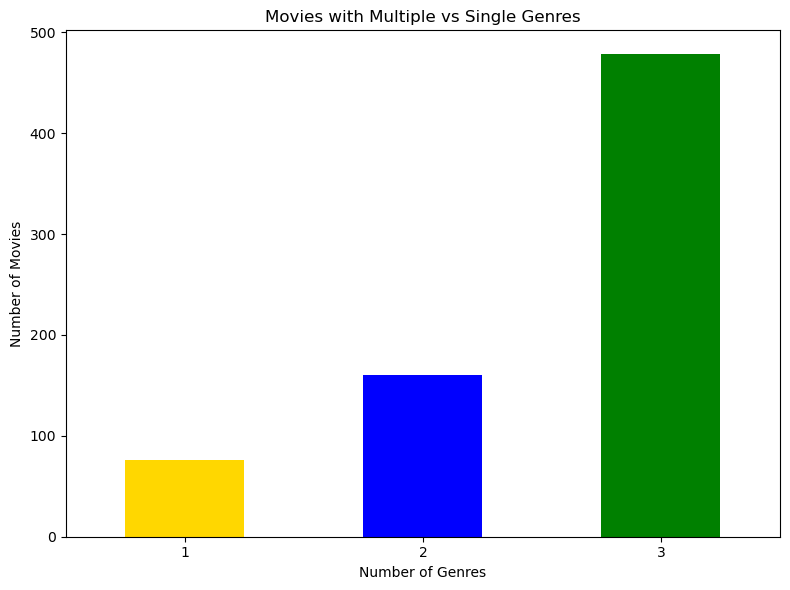

In [42]:
# Split genre column, counting the genres for each movie
imdb['Num Genres'] = imdb['Genre'].str.split(',').apply(lambda x: len(x))

# Group movies by the number of genres
grouped = imdb.groupby('Num Genres')['Movie Title'].count()

# Plot
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color=['gold', 'blue', 'green'])
plt.title('Movies with Multiple vs Single Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\452380136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_genres['Genres'] = three_genres['Genre'].str.split(',')


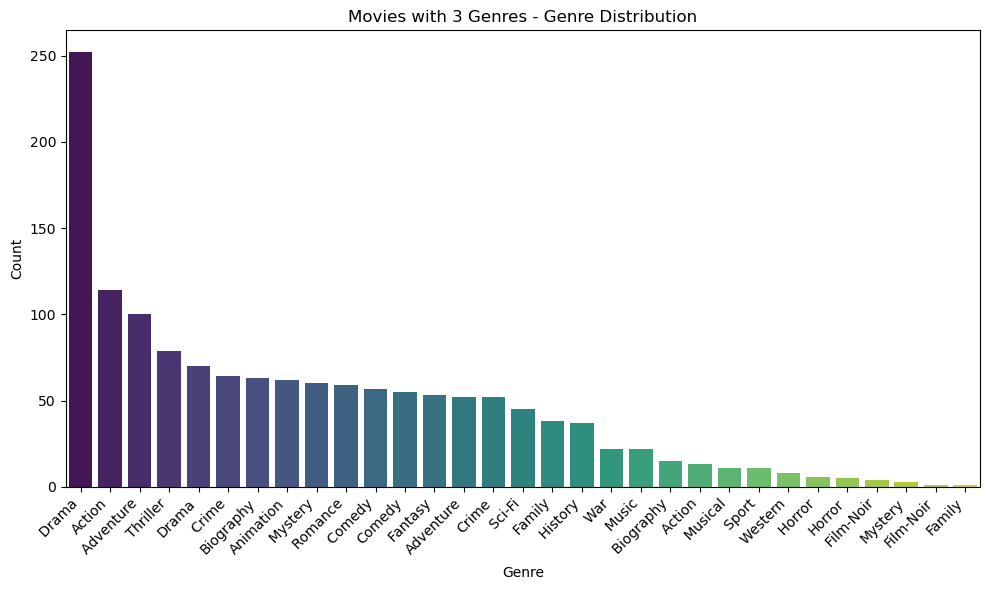

In [43]:
# Filter movies with 3 genres
three_genres = imdb[imdb['Num Genres'] == 3]

# Split the 'Genre' column to access each individual genre
three_genres['Genres'] = three_genres['Genre'].str.split(',')

# Create a list to store dictionaries
genre_data_list = []

# Iterate each row for specific genres
for index, row in three_genres.iterrows():
    movie_title = row['Movie Title']
    genres = row['Genres']
    for genre in genres:
        genre_data_list.append({'Movie Title': movie_title, 'Genre': genre})

# Create a df
genre_data = pd.DataFrame(genre_data_list)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=genre_data, x='Genre', order=genre_data['Genre'].value_counts().index, palette='viridis')
plt.title('Movies with 3 Genres - Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\3503156936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_genres['Genres'] = two_genres['Genre'].str.split(',')


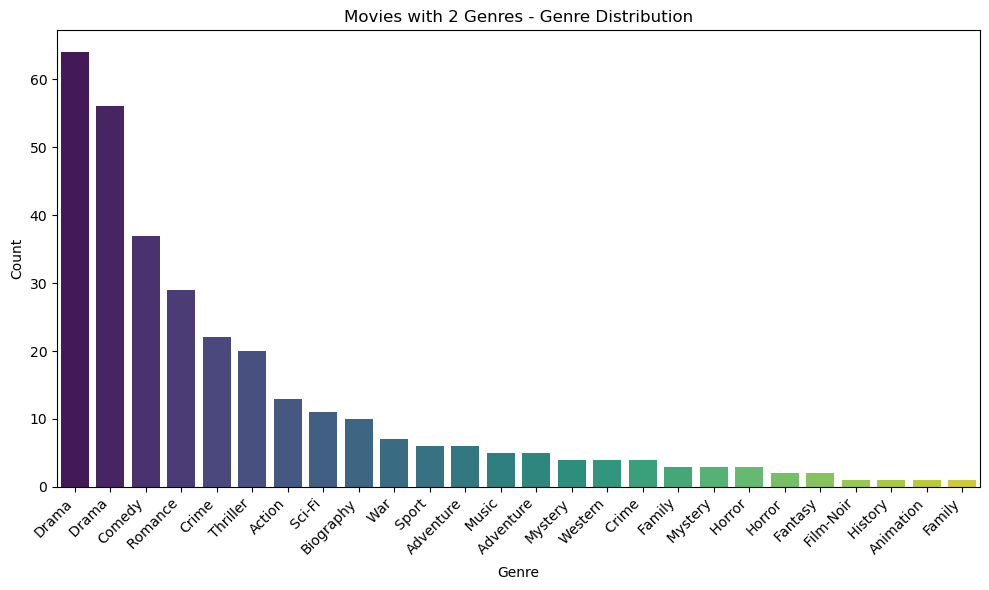

In [44]:
# Filter movies with 2 genres
two_genres = imdb[imdb['Num Genres'] == 2]

# Split the 'Genre' column to access each individual genre
two_genres['Genres'] = two_genres['Genre'].str.split(',')

# Create a list to store dictionaries
genre_data_list = []

# Iterate each row for specific genres
for index, row in two_genres.iterrows():
    movie_title = row['Movie Title']
    genres = row['Genres']
    for genre in genres:
        genre_data_list.append({'Movie Title': movie_title, 'Genre': genre})

# Create a df
genre_data = pd.DataFrame(genre_data_list)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=genre_data, x='Genre', order=genre_data['Genre'].value_counts().index, palette='viridis')
plt.title('Movies with 2 Genres - Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\884983835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_genre['Genres'] = one_genre['Genre'].str.split(',')


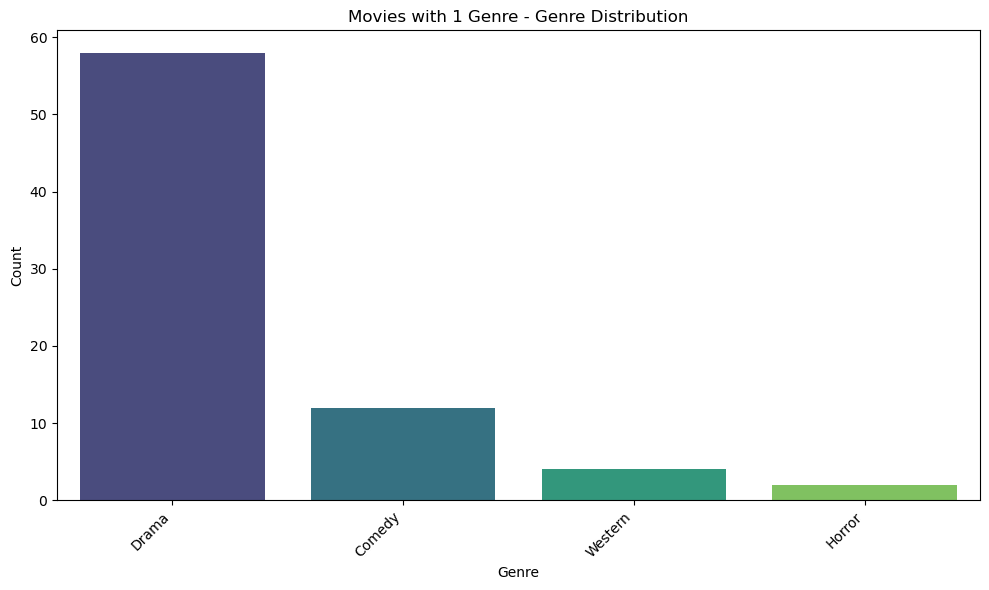

In [45]:
# Filter movies with 1 genre
one_genre = imdb[imdb['Num Genres'] == 1]

# Split the 'Genre' column to access each individual genre
one_genre['Genres'] = one_genre['Genre'].str.split(',')
# Create a list to store dictionaries
genre_data_list = []

# Iterate each row for specific genres
for index, row in one_genre.iterrows():
    movie_title = row['Movie Title']
    genres = row['Genres']
    for genre in genres:
        genre_data_list.append({'Movie Title': movie_title, 'Genre': genre})

# Create a df
genre_data = pd.DataFrame(genre_data_list)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=genre_data, x='Genre', order=genre_data['Genre'].value_counts().index, palette='viridis')
plt.title('Movies with 1 Genre - Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
# Correlation
correlation_imdb_meta = imdb['IMDB Rating'].corr(imdb['Meta-Score'])

print("Correlation between IMDB Rating and Meta-Score:", correlation_imdb_meta)

Correlation between IMDB Rating and Meta-Score: 0.28089438848527887


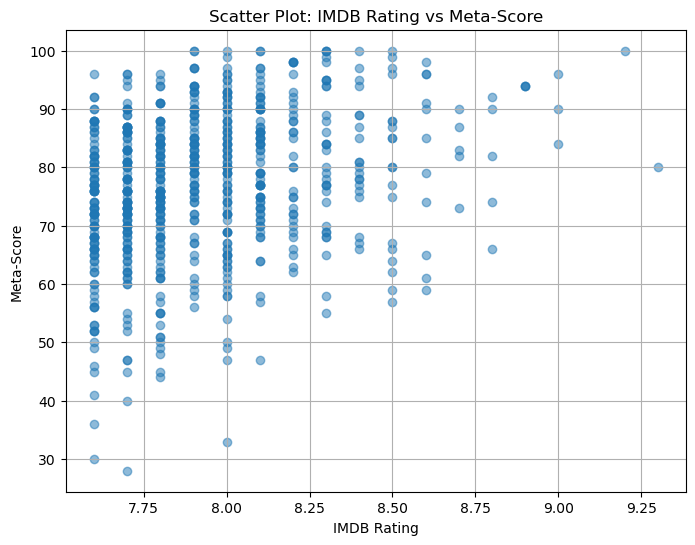

In [47]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(imdb['IMDB Rating'], imdb['Meta-Score'], alpha=0.5)
plt.title('Scatter Plot: IMDB Rating vs Meta-Score')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta-Score')
plt.grid(True)
plt.show()

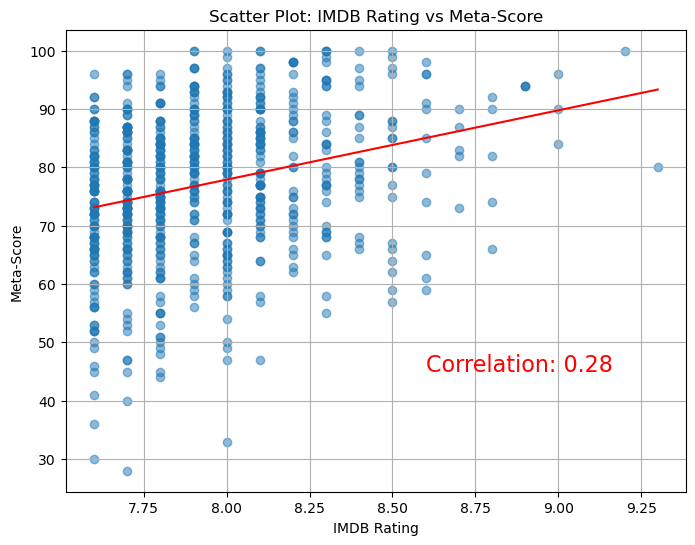

In [48]:
# Correlation
correlation_imdb_meta = imdb['IMDB Rating'].corr(imdb['Meta-Score'])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(imdb['IMDB Rating'], imdb['Meta-Score'], alpha=0.5)
plt.title('Scatter Plot: IMDB Rating vs Meta-Score')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta-Score')
plt.grid(True)

# Add corrlation line
plt.plot(np.unique(imdb['IMDB Rating']), np.poly1d(np.polyfit(imdb['IMDB Rating'], imdb['Meta-Score'], 1))(np.unique(imdb['IMDB Rating'])), color='red')

# Correlation shown on the graph
plt.text(8.6, 45, f'Correlation: {correlation_imdb_meta:.2f}', fontsize=16, color='red')

plt.show()

In [49]:
# on 'Total Money Earned', it's a currency on the csv, so we have to remove the '$' and ',' then convert to float
imdb['Total Money Earned'] = imdb['Total Money Earned'].replace('[\$,]', '', regex=True).astype(float)

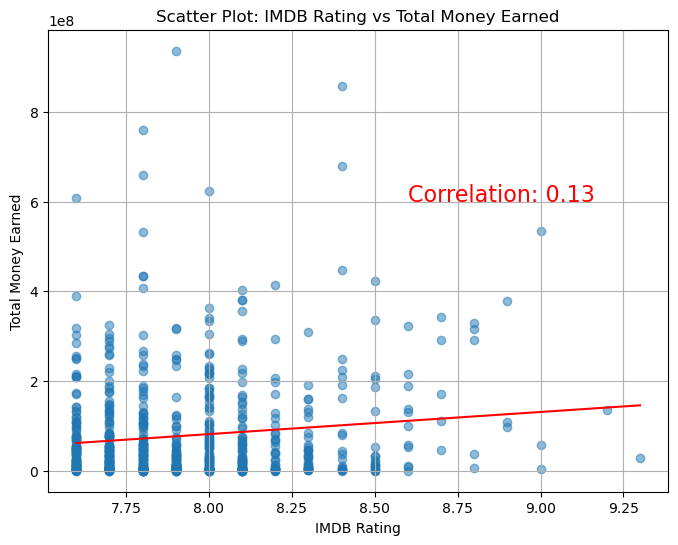

In [50]:
# Correlation
correlation_imdb_money = imdb['IMDB Rating'].corr(imdb['Total Money Earned'])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(imdb['IMDB Rating'], imdb['Total Money Earned'], alpha=0.5)
plt.title('Scatter Plot: IMDB Rating vs Total Money Earned')
plt.xlabel('IMDB Rating')
plt.ylabel('Total Money Earned')
plt.grid(True)

# Add corrlation line
plt.plot(np.unique(imdb['IMDB Rating']), np.poly1d(np.polyfit(imdb['IMDB Rating'], imdb['Total Money Earned'], 1))(np.unique(imdb['IMDB Rating'])), color='red')

# Correlation shown on the graph
plt.text(8.6, 6e8, f'Correlation: {correlation_imdb_money:.2f}', fontsize=16, color='red')

plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\3671612368.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morgan_freeman_data['Release Year'] = pd.to_datetime(morgan_freeman_data['Release Year'], format='%Y')
C:\Users\walje\AppData\Local\Temp\ipykernel_19076\3671612368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morgan_freeman_data.sort_values(by='Release Year', inplace=True)


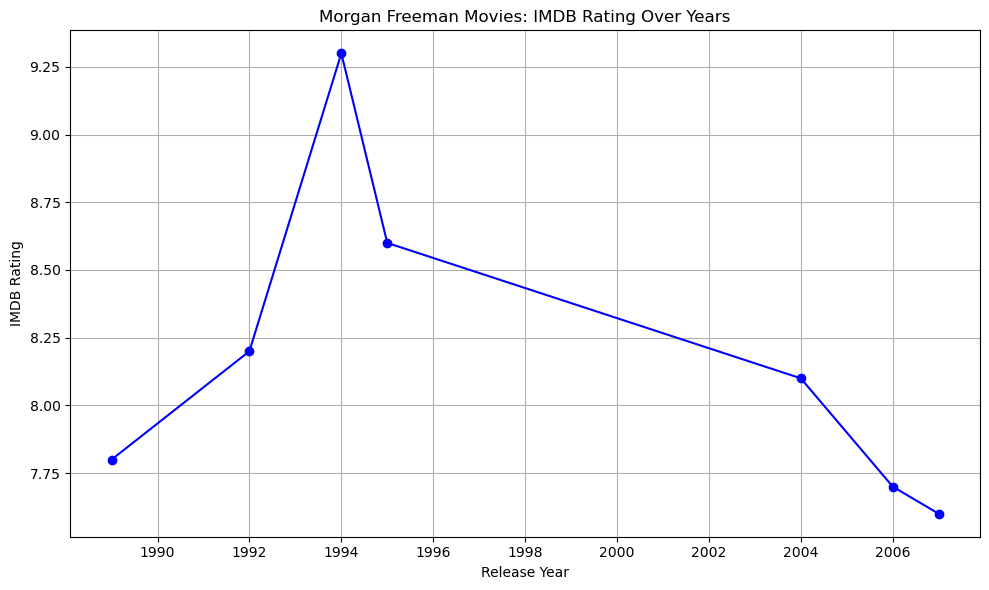

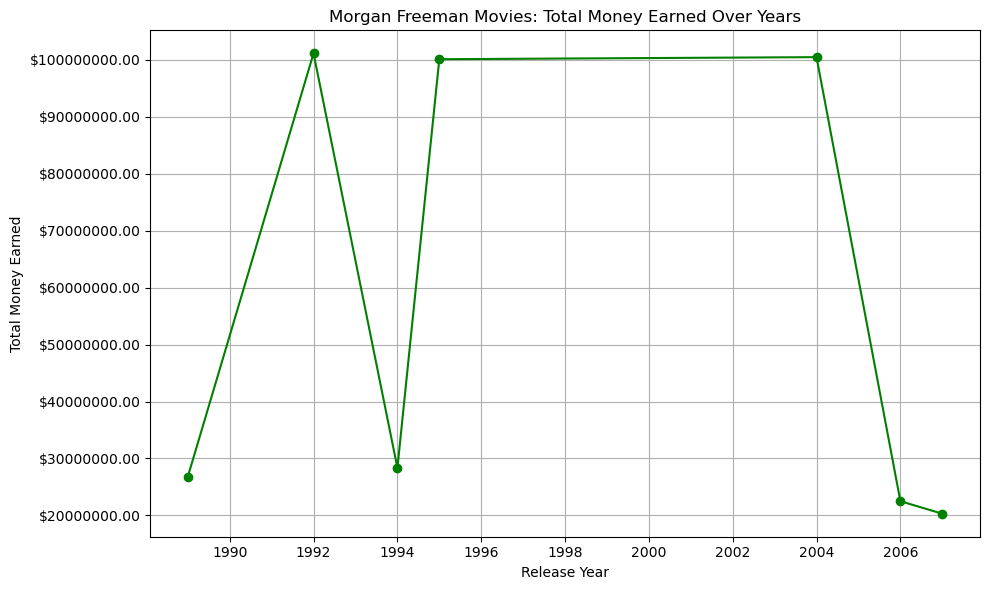

In [51]:
# Filter movies starring Morgan Freeman
morgan_freeman_movies = imdb[
    (imdb['Movie Star #1'].str.contains('Morgan Freeman', case=False, na=False)) |
    (imdb['Movie Star #2'].str.contains('Morgan Freeman', case=False, na=False)) |
    (imdb['Movie Star #3'].str.contains('Morgan Freeman', case=False, na=False)) |
    (imdb['Movie Star #4'].str.contains('Morgan Freeman', case=False, na=False))
]

morgan_freeman_data = morgan_freeman_movies[['Movie Title', 'IMDB Rating', 'Total Money Earned', 'Release Year']]

# Convert Release Year to datetime 
morgan_freeman_data['Release Year'] = pd.to_datetime(morgan_freeman_data['Release Year'], format='%Y')

# Sort data by release year
morgan_freeman_data.sort_values(by='Release Year', inplace=True)

# Plot the IMDB rating and release year
plt.figure(figsize=(10, 6))
plt.plot(morgan_freeman_data['Release Year'], morgan_freeman_data['IMDB Rating'], marker='o', color='blue')
plt.title('Morgan Freeman Movies: IMDB Rating Over Years')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(morgan_freeman_data['Release Year'], morgan_freeman_data['Total Money Earned'], marker='o', color='green')
plt.title('Morgan Freeman Movies: Total Money Earned Over Years')
plt.xlabel('Release Year')
plt.ylabel('Total Money Earned')
plt.grid(True)

# Format y-axis tick labels as currency
formatter = ticker.FormatStrFormatter('$%1.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\2363293932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_de_niro_data['Release Year'] = pd.to_datetime(robert_de_niro_data['Release Year'], format='%Y')
C:\Users\walje\AppData\Local\Temp\ipykernel_19076\2363293932.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_de_niro_data.sort_values(by='Release Year', inplace=True)


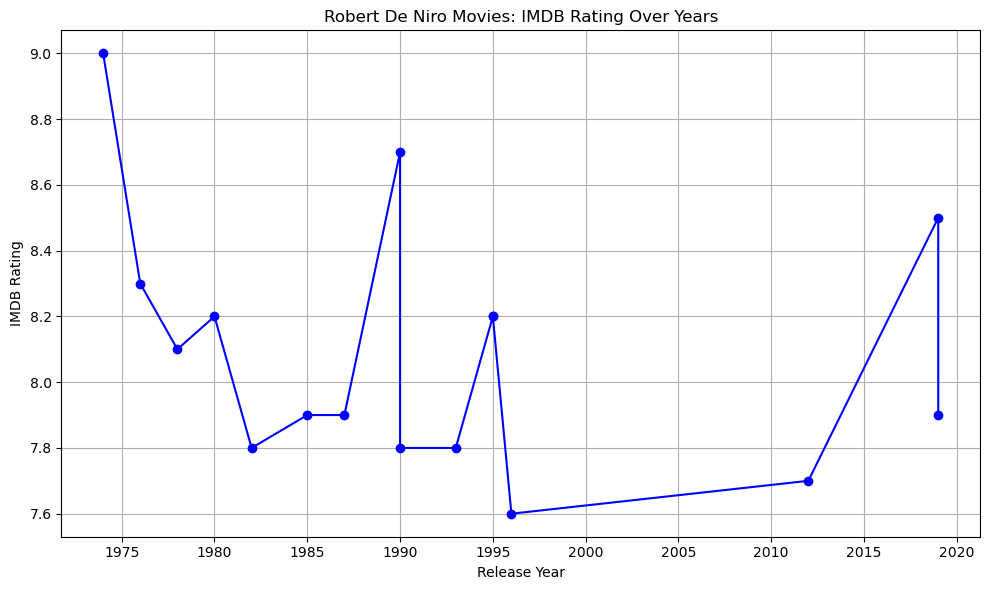

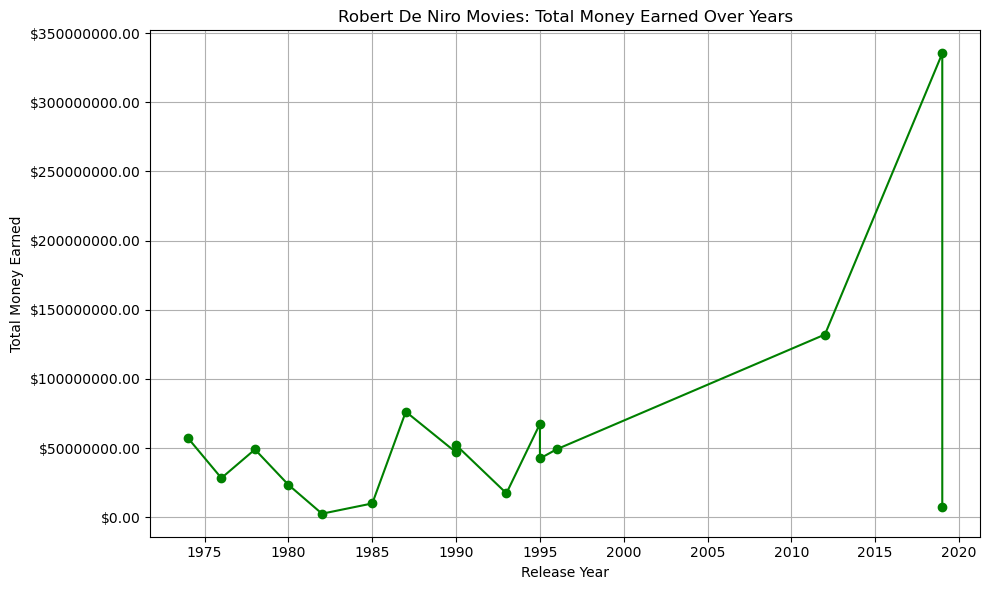

In [52]:
# Filter movies starring Robert De Niro
robert_de_niro_movies = imdb[
    (imdb['Movie Star #1'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #2'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #3'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #4'].str.contains('Robert De Niro', case=False, na=False))
]

robert_de_niro_data = robert_de_niro_movies[['Movie Title', 'IMDB Rating', 'Total Money Earned', 'Release Year']]

# Convert 'Release Year' to datetime format
robert_de_niro_data['Release Year'] = pd.to_datetime(robert_de_niro_data['Release Year'], format='%Y')

# Sort data by release year
robert_de_niro_data.sort_values(by='Release Year', inplace=True)

# Plot the IMDB rating and release year
plt.figure(figsize=(10, 6))
plt.plot(robert_de_niro_data['Release Year'], robert_de_niro_data['IMDB Rating'], marker='o', color='blue')
plt.title('Robert De Niro Movies: IMDB Rating Over Years')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(robert_de_niro_data['Release Year'], robert_de_niro_data['Total Money Earned'], marker='o', color='green')
plt.title('Robert De Niro Movies: Total Money Earned Over Years')
plt.xlabel('Release Year')
plt.ylabel('Total Money Earned')
plt.grid(True)

# Format y-axis tick labels as currency
formatter = ticker.FormatStrFormatter('$%1.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\600536456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jodie_foster_data['Release Year'] = pd.to_datetime(jodie_foster_data['Release Year'], format='%Y')
C:\Users\walje\AppData\Local\Temp\ipykernel_19076\600536456.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jodie_foster_data.sort_values(by='Release Year', inplace=True)


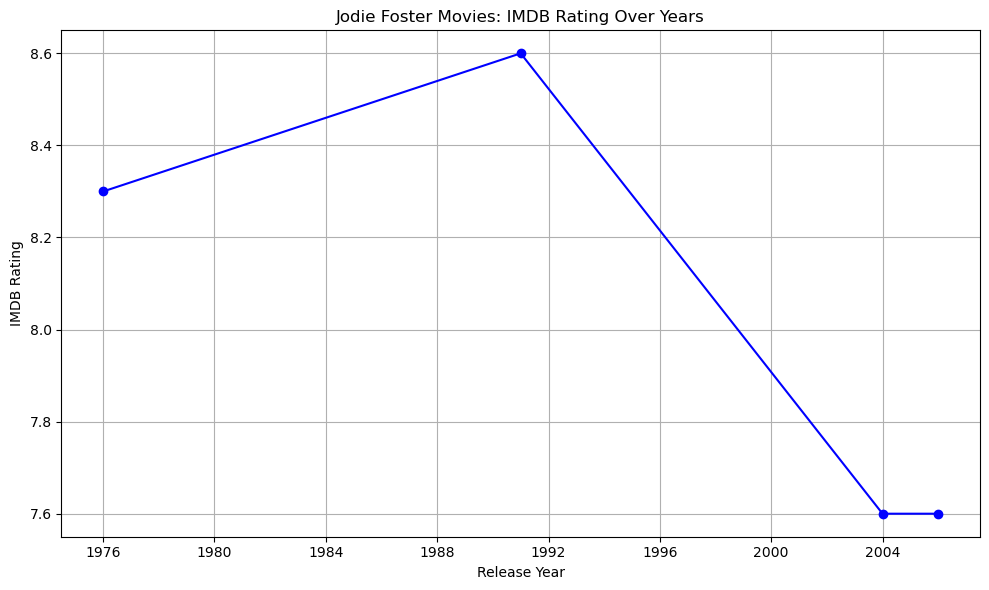

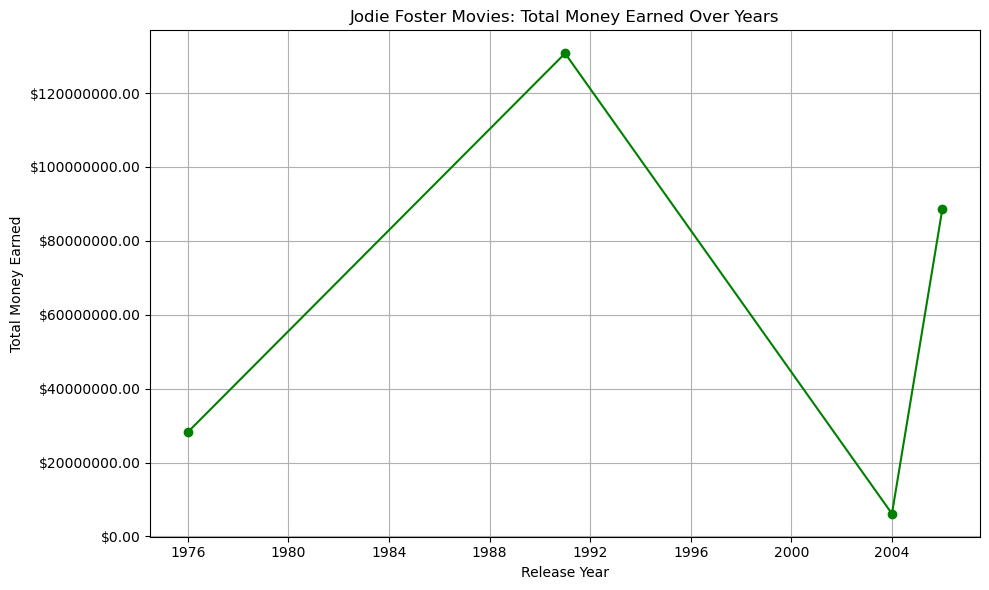

In [53]:
# Filter movies starring Jodie Foster
jodie_foster_movies = imdb[
    (imdb['Movie Star #1'].str.contains('Jodie Foster', case=False, na=False)) |
    (imdb['Movie Star #2'].str.contains('Jodie Foster', case=False, na=False)) |
    (imdb['Movie Star #3'].str.contains('Jodie Foster', case=False, na=False)) |
    (imdb['Movie Star #4'].str.contains('Jodie Foster', case=False, na=False))
]

jodie_foster_data = jodie_foster_movies[['Movie Title', 'IMDB Rating', 'Total Money Earned', 'Release Year']]

# Convert 'Release Year' to datetime format
jodie_foster_data['Release Year'] = pd.to_datetime(jodie_foster_data['Release Year'], format='%Y')

# Sort data by release year
jodie_foster_data.sort_values(by='Release Year', inplace=True)

# Plot the IMDB rating and release year
plt.figure(figsize=(10, 6))
plt.plot(jodie_foster_data['Release Year'], jodie_foster_data['IMDB Rating'], marker='o', color='blue')
plt.title('Jodie Foster Movies: IMDB Rating Over Years')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(jodie_foster_data['Release Year'], jodie_foster_data['Total Money Earned'], marker='o', color='green')
plt.title('Jodie Foster Movies: Total Money Earned Over Years')
plt.xlabel('Release Year')
plt.ylabel('Total Money Earned')
plt.grid(True)

# Format y-axis tick labels as currency
formatter = ticker.FormatStrFormatter('$%1.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\3076310961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spielberg_data['Release Year'] = pd.to_datetime(spielberg_data['Release Year'], format='%Y')
C:\Users\walje\AppData\Local\Temp\ipykernel_19076\3076310961.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spielberg_data.sort_values(by='Release Year', inplace=True)


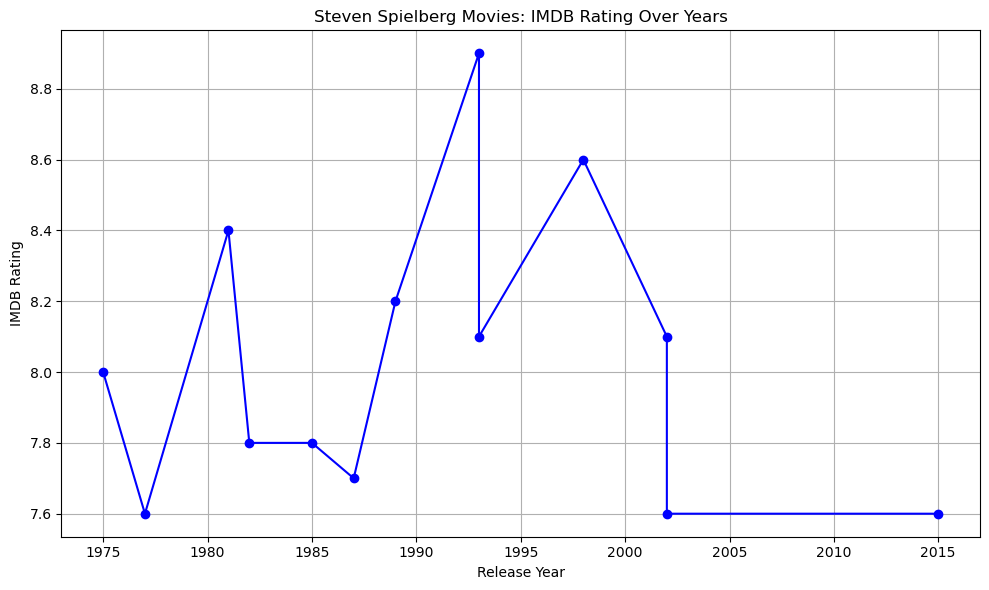

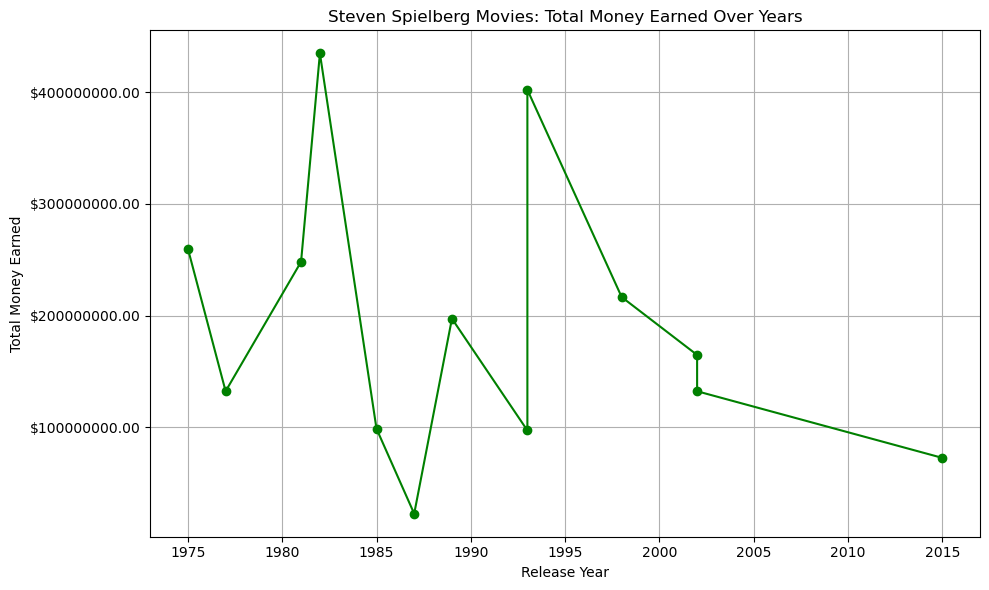

In [18]:
# Filter movies directed by Steven Spielberg
spielberg_movies = imdb[imdb['Director'].str.contains('Steven Spielberg', case=False, na=False)]

spielberg_data = spielberg_movies[['Movie Title', 'IMDB Rating', 'Total Money Earned', 'Release Year']]

# Convert Release Year to datetime 
spielberg_data['Release Year'] = pd.to_datetime(spielberg_data['Release Year'], format='%Y')

# Sort data by release year
spielberg_data.sort_values(by='Release Year', inplace=True)

# Plot the IMDB rating and release year
plt.figure(figsize=(10, 6))
plt.plot(spielberg_data['Release Year'], spielberg_data['IMDB Rating'], marker='o', color='blue')
plt.title('Steven Spielberg Movies: IMDB Rating Over Years')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(spielberg_data['Release Year'], spielberg_data['Total Money Earned'], marker='o', color='green')
plt.title('Steven Spielberg Movies: Total Money Earned Over Years')
plt.xlabel('Release Year')
plt.ylabel('Total Money Earned')
plt.grid(True)

# Format y-axis tick labels as currency
formatter = ticker.FormatStrFormatter('$%1.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\2746805940.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_de_niro_data['Release Year'] = pd.to_datetime(robert_de_niro_data['Release Year'], format='%Y')
C:\Users\walje\AppData\Local\Temp\ipykernel_19076\2746805940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_de_niro_data.sort_values(by='Release Year', inplace=True)


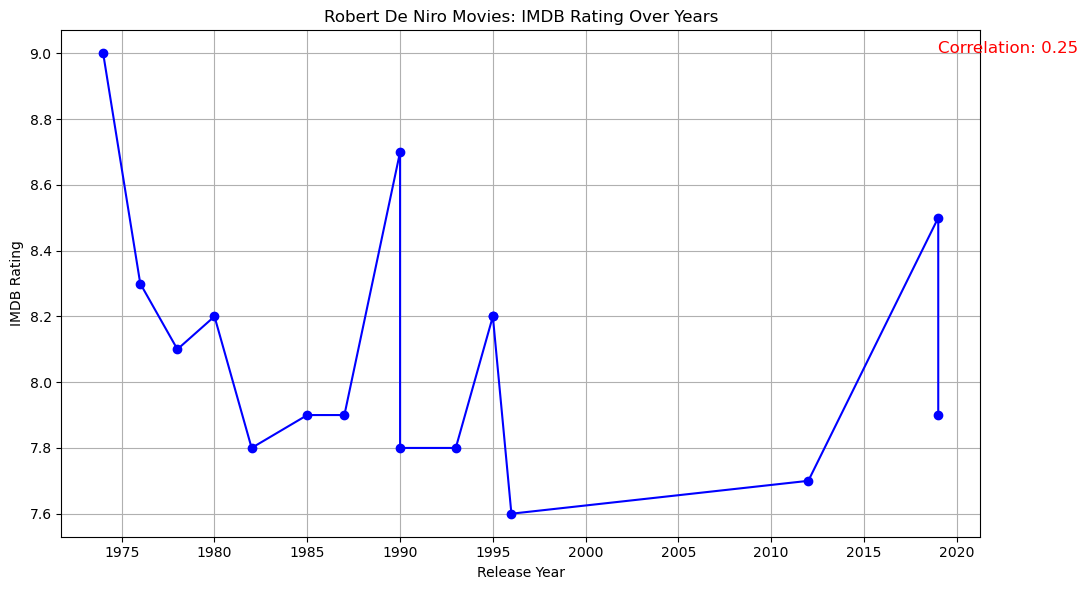

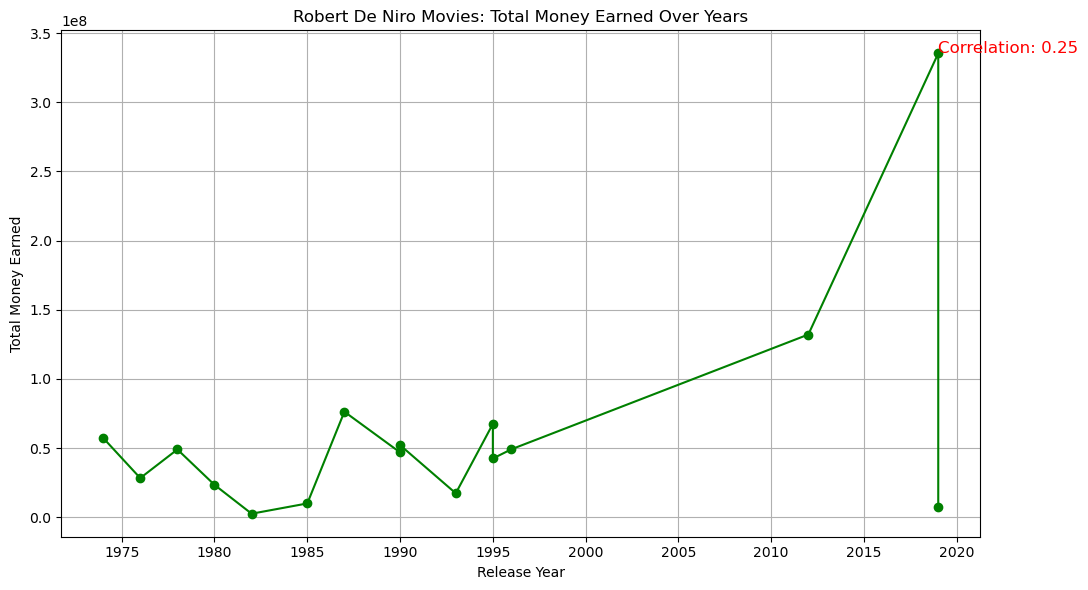

In [19]:
# Filter movies starring Robert De Niro
robert_de_niro_movies = imdb[
    (imdb['Movie Star #1'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #2'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #3'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #4'].str.contains('Robert De Niro', case=False, na=False))
]

robert_de_niro_data = robert_de_niro_movies[['Movie Title', 'IMDB Rating', 'Total Money Earned', 'Release Year']]

robert_de_niro_data['Release Year'] = pd.to_datetime(robert_de_niro_data['Release Year'], format='%Y')

# Sort data by release year
robert_de_niro_data.sort_values(by='Release Year', inplace=True)

# Calculate the correlation 
correlation_imdb_money = robert_de_niro_data['IMDB Rating'].corr(robert_de_niro_data['Total Money Earned'])

# Plot the IMDB rating and release year
plt.figure(figsize=(10, 6))
plt.plot(robert_de_niro_data['Release Year'], robert_de_niro_data['IMDB Rating'], marker='o', color='blue')
plt.title('Robert De Niro Movies: IMDB Rating Over Years')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.tight_layout()

# Display the correlation on the plot
plt.text(robert_de_niro_data['Release Year'].max(), robert_de_niro_data['IMDB Rating'].max(),
         f'Correlation: {correlation_imdb_money:.2f}', fontsize=12, color='red')

plt.show()

# Plot Total Money Earned and release year
plt.figure(figsize=(10, 6))
plt.plot(robert_de_niro_data['Release Year'], robert_de_niro_data['Total Money Earned'], marker='o', color='green')
plt.title('Robert De Niro Movies: Total Money Earned Over Years')
plt.xlabel('Release Year')
plt.ylabel('Total Money Earned')
plt.grid(True)
plt.tight_layout()

# Display the correlation on the plot
plt.text(robert_de_niro_data['Release Year'].max(), robert_de_niro_data['Total Money Earned'].max(),
         f'Correlation: {correlation_imdb_money:.2f}', fontsize=12, color='red')

plt.show()

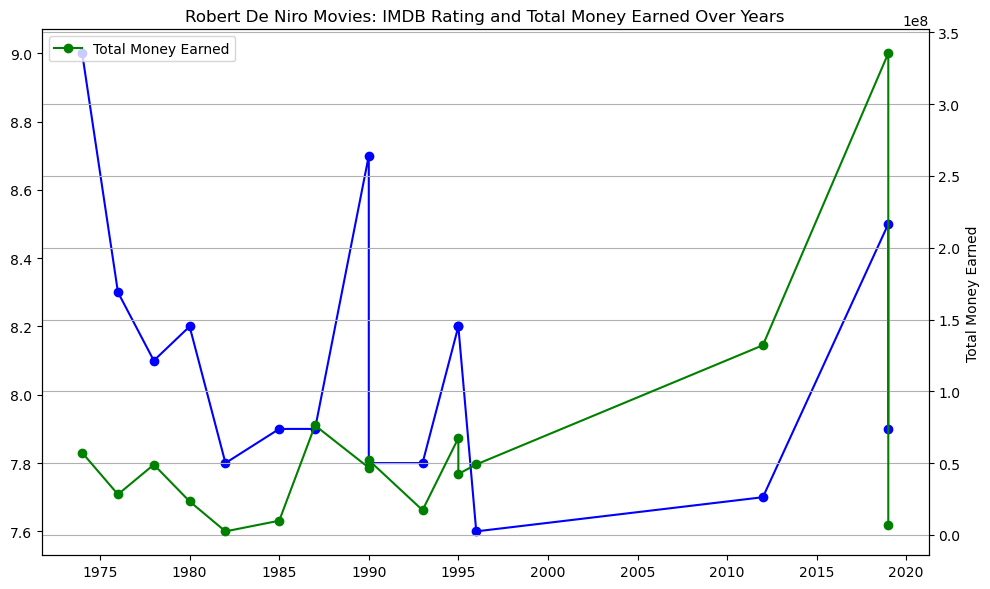

In [20]:
# Plotting IMDb rating and Total Money Earned on the same plot
plt.figure(figsize=(10, 6))

# Plot IMDb rating
plt.plot(robert_de_niro_data['Release Year'], robert_de_niro_data['IMDB Rating'], marker='o', color='blue', label='IMDB Rating')

# Create a secondary y-axis for Total Money Earned
ax2 = plt.gca().twinx()
ax2.plot(robert_de_niro_data['Release Year'], robert_de_niro_data['Total Money Earned'], marker='o', color='green', label='Total Money Earned')

# Set labels and title
plt.title('Robert De Niro Movies: IMDB Rating and Total Money Earned Over Years')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
ax2.set_ylabel('Total Money Earned')

# Show legend
plt.legend(loc='upper left')

# Show grid
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\walje\AppData\Local\Temp\ipykernel_19076\4111134721.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morgan_freeman_data['Release Year'] = pd.to_datetime(morgan_freeman_data['Release Year'], format='%Y')
C:\Users\walje\AppData\Local\Temp\ipykernel_19076\4111134721.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morgan_freeman_data.sort_values(by='Release Year', inplace=True)


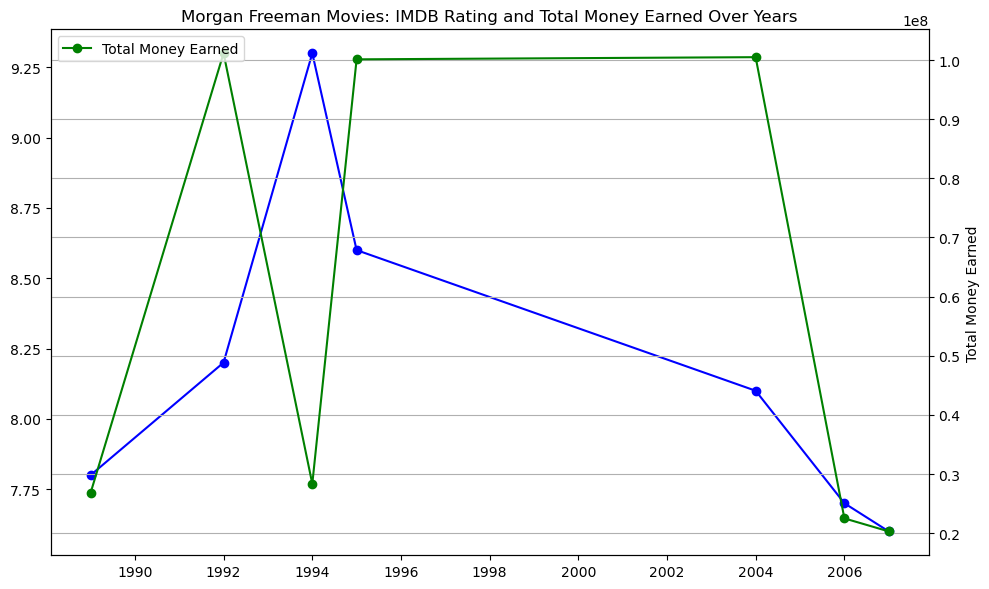

In [54]:
# Filter movies starring Morgan Freeman
morgan_freeman_movies = imdb[
    (imdb['Movie Star #1'].str.contains('Morgan Freeman', case=False, na=False)) |
    (imdb['Movie Star #2'].str.contains('Morgan Freeman', case=False, na=False)) |
    (imdb['Movie Star #3'].str.contains('Morgan Freeman', case=False, na=False)) |
    (imdb['Movie Star #4'].str.contains('Morgan Freeman', case=False, na=False))
]

morgan_freeman_data = morgan_freeman_movies[['Release Year', 'IMDB Rating', 'Total Money Earned']]

# Convert Release Year to datetime
morgan_freeman_data['Release Year'] = pd.to_datetime(morgan_freeman_data['Release Year'], format='%Y')

# Sort data by release year
morgan_freeman_data.sort_values(by='Release Year', inplace=True)

# Plotting IMDb rating and Total Money Earned on the same plot
plt.figure(figsize=(10, 6))

# Plot IMDb rating
plt.plot(morgan_freeman_data['Release Year'], morgan_freeman_data['IMDB Rating'], marker='o', color='blue', label='IMDB Rating')

# Create a secondary y-axis for Total Money Earned
ax2 = plt.gca().twinx()
ax2.plot(morgan_freeman_data['Release Year'], morgan_freeman_data['Total Money Earned'], marker='o', color='green', label='Total Money Earned')

# Set labels and title
plt.title('Morgan Freeman Movies: IMDB Rating and Total Money Earned Over Years')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
ax2.set_ylabel('Total Money Earned')

# Show legend
plt.legend(loc='upper left')

# Show grid
plt.grid(True)

plt.tight_layout()
plt.show()

In [55]:
# Correlation
correlation_imdb_morgan_freeman = morgan_freeman_data['IMDB Rating'].corr(morgan_freeman_data['Total Money Earned'])

print(f"Correlation between IMDb Rating and Total Money for Morgan Freeman movies: {correlation_imdb_morgan_freeman:.2f}")


Correlation between IMDb Rating and Total Money for Morgan Freeman movies: 0.22


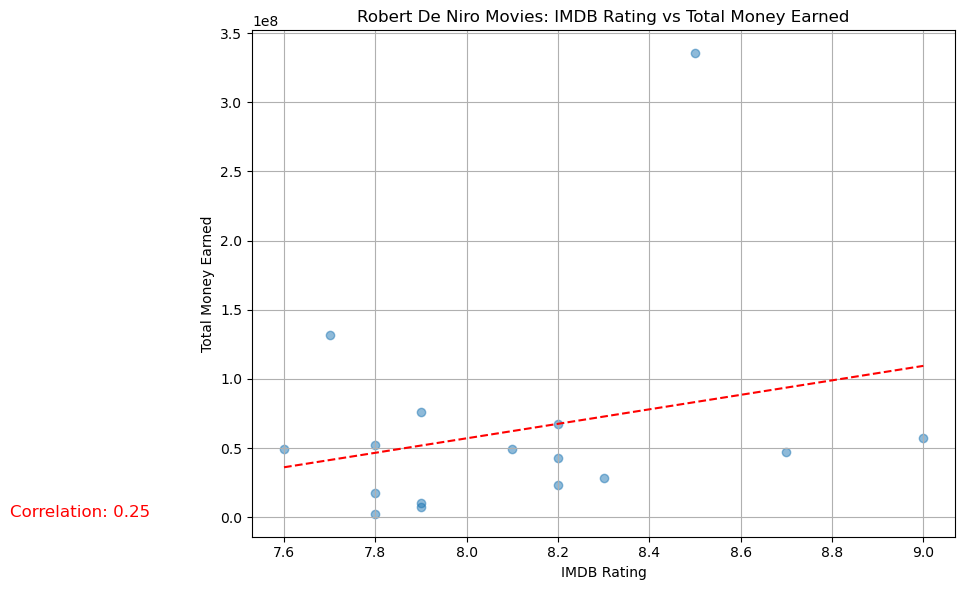

In [57]:
# Filter movies starring Robert De Niro
robert_de_niro_movies = imdb[
    (imdb['Movie Star #1'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #2'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #3'].str.contains('Robert De Niro', case=False, na=False)) |
    (imdb['Movie Star #4'].str.contains('Robert De Niro', case=False, na=False))
]

robert_de_niro_data = robert_de_niro_movies[['IMDB Rating', 'Total Money Earned']]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(robert_de_niro_data['IMDB Rating'], robert_de_niro_data['Total Money Earned'], alpha=0.5)

# Set labels
plt.title('Robert De Niro Movies: IMDB Rating vs Total Money Earned')
plt.xlabel('IMDB Rating')
plt.ylabel('Total Money Earned')

# Calculate the correlation
correlation_imdb_robert_de_niro = robert_de_niro_data['IMDB Rating'].corr(robert_de_niro_data['Total Money Earned'])

# Calculate the regression line
slope, intercept = np.polyfit(robert_de_niro_data['IMDB Rating'], robert_de_niro_data['Total Money Earned'], 1)
x_values = np.linspace(robert_de_niro_data['IMDB Rating'].min(), robert_de_niro_data['IMDB Rating'].max(), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', linestyle='--', label='Correlation Line')

# Correlation display
plt.text(7, 35, f'Correlation: {correlation_imdb_robert_de_niro:.2f}', fontsize=12, color='red')

plt.grid(True)
plt.tight_layout()
plt.show()